### Jupyter notebook to run simCell.m and display results
This notebook executes simCell.m and displays results of the simulation.
Output from this notebook will be used as practice quiz answers for lesson 2.3.5.

In [13]:
% load the E2 circuit model as well as the E2 dynamic data
addpath readonly
load readonly/E2model.mat; % load parameter values already created for the E2 cell
load readonly/E2_DYN_P25.mat; % load raw test data for the E2 cell at 25 degC

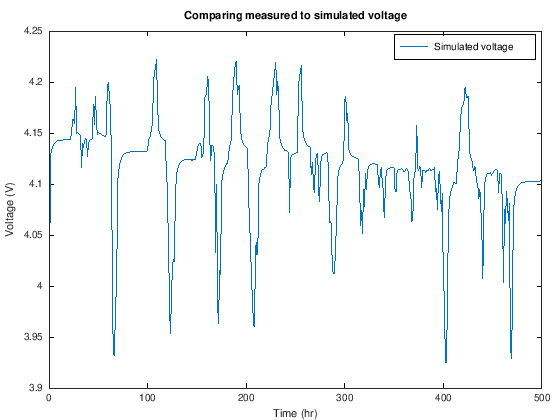

In [18]:
% Resample at consistent 1Hz rate.
deltaT = 1; 
time = DYNData.script1.time - DYNData.script1.time(1);    
t = (0:deltaT:time(end));
voltage = interp1(time,DYNData.script1.voltage,t);
current = interp1(time,DYNData.script1.current,t);
time = t;
current_profile = current(2500:3000);
[vest,rck,hk,zk,sik,OCV] = simCell(current_profile,25,deltaT,model,1,0,0);
plot(time(1:501), vest); % factor of 3600 converts seconds -> hours
xlabel('Time (hr)'); ylabel('Voltage (V)'); title('Comparing measured to simulated voltage');
legend('Simulated voltage');

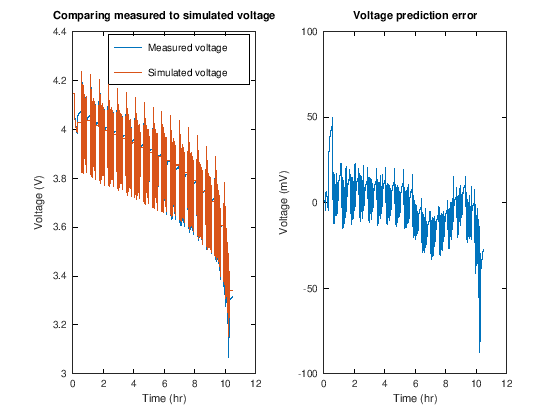

In [4]:
% execute simCell to determine voltage and other internal states/variables
[vest,rck,hk,zk,sik,OCV] = simCell(current,25,deltaT,model,1,0,0);

% for visualization purposes, plot the measured and simulated voltage data
subplot(1,2,1)
plot(time/3600,voltage,time/3600,vest); % factor of 3600 converts seconds -> hours
xlabel('Time (hr)'); ylabel('Voltage (V)'); title('Comparing measured to simulated voltage');
legend('Measured voltage','Simulated voltage');

% Now, plot the voltage prediction error
subplot(1,2,2)
plot(time/3600,1000*(voltage-vest'));
xlabel('Time (hr)'); ylabel('Voltage (mV)'); title('Voltage prediction error');

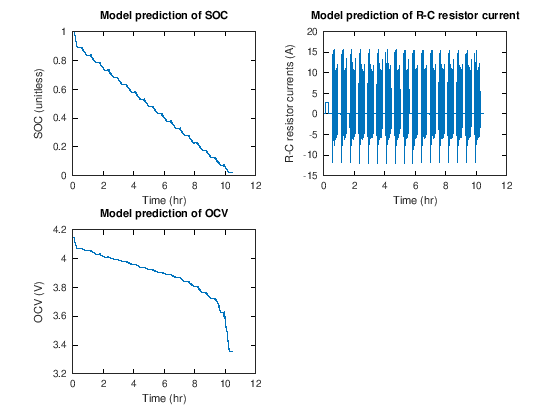

In [5]:
% Visualize the change in SOC over the test
subplot(2,2,1); plot(time/3600,zk);
xlabel('Time (hr)'); ylabel('SOC (unitless)'); title('Model prediction of SOC');

% Visualize the change in R-C resistor currents over the test
subplot(2,2,2); plot(time/3600,rck);
xlabel('Time (hr)'); ylabel('R-C resistor currents (A)'); title('Model prediction of R-C resistor current');

% Visualize the change in cell OCV over the test
subplot(2,2,3); plot(time/3600,OCV);
xlabel('Time (hr)'); ylabel('OCV (V)'); title('Model prediction of OCV');

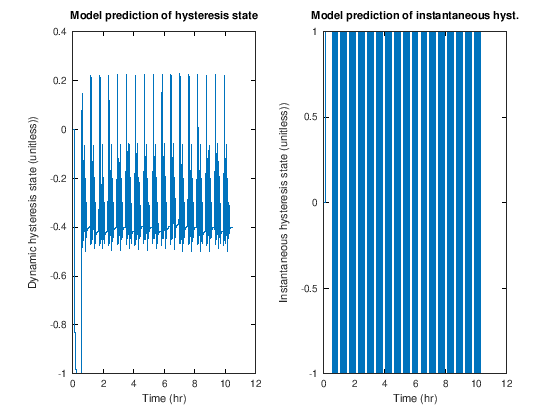

In [6]:
% Visualize the change in dynamic hysteresis over the test
subplot(1,2,1); plot(time/3600,hk);
xlabel('Time (hr)'); ylabel('Dynamic hysteresis state (unitless))'); title('Model prediction of hysteresis state');

% Visualize the change in instantaneous hysteresis state over the test
subplot(1,2,2); plot(time/3600,sik);
xlabel('Time (hr)'); ylabel('Instantaneous hysteresis state (unitless))'); title('Model prediction of instantaneous hyst.');

In [7]:
% To find a signal's value at a particular time, you can index as follows:
voltage(time == 600) % to find voltage at time = 600 seconds, for example

ans =  4.0302
